# Building a Linear Regression Model
## Context

### The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository

## Content

### Title: Auto-Mpg Data

## Sources:
#### (a) Origin: This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.
#### (c) Date: July 7, 1993


## Relevant Information:

#### This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute “mpg”, 8 of the original instances were removed because they had unknown values for the “mpg” attribute. The original dataset is available in the file “auto-mpg.data original”. “The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.” (Quinlan, 1993)

### Number of Instances: 398

### Number of Attributes: 9 including the class attribute

## Attribute Information:
#### mpg: continuous
#### cylinders: multi-valued discrete
#### displacement: continuous
#### horsepower: continuous
#### weight: continuous
#### acceleration: continuous
#### model year: multi-valued discrete
#### origin: multi-valued discrete
#### car name: string (unique for each instance)

## Missing Attribute Values: horsepower has 6 missing values

## Acknowledgements

Dataset: UCI Machine Learning Repository
Data link : https://archive.ics.uci.edu/ml/datasets/auto+mpg

## Importing the main libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data

In [3]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   cyl     392 non-null    int64  
 2   displ   392 non-null    float64
 3   hp      392 non-null    int64  
 4   weight  392 non-null    int64  
 5   accel   392 non-null    float64
 6   yr      392 non-null    int64  
 7   origin  392 non-null    int64  
 8   name    392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [5]:
df.describe()

,mpg,cyl,displ,hp,weight,accel,yr,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


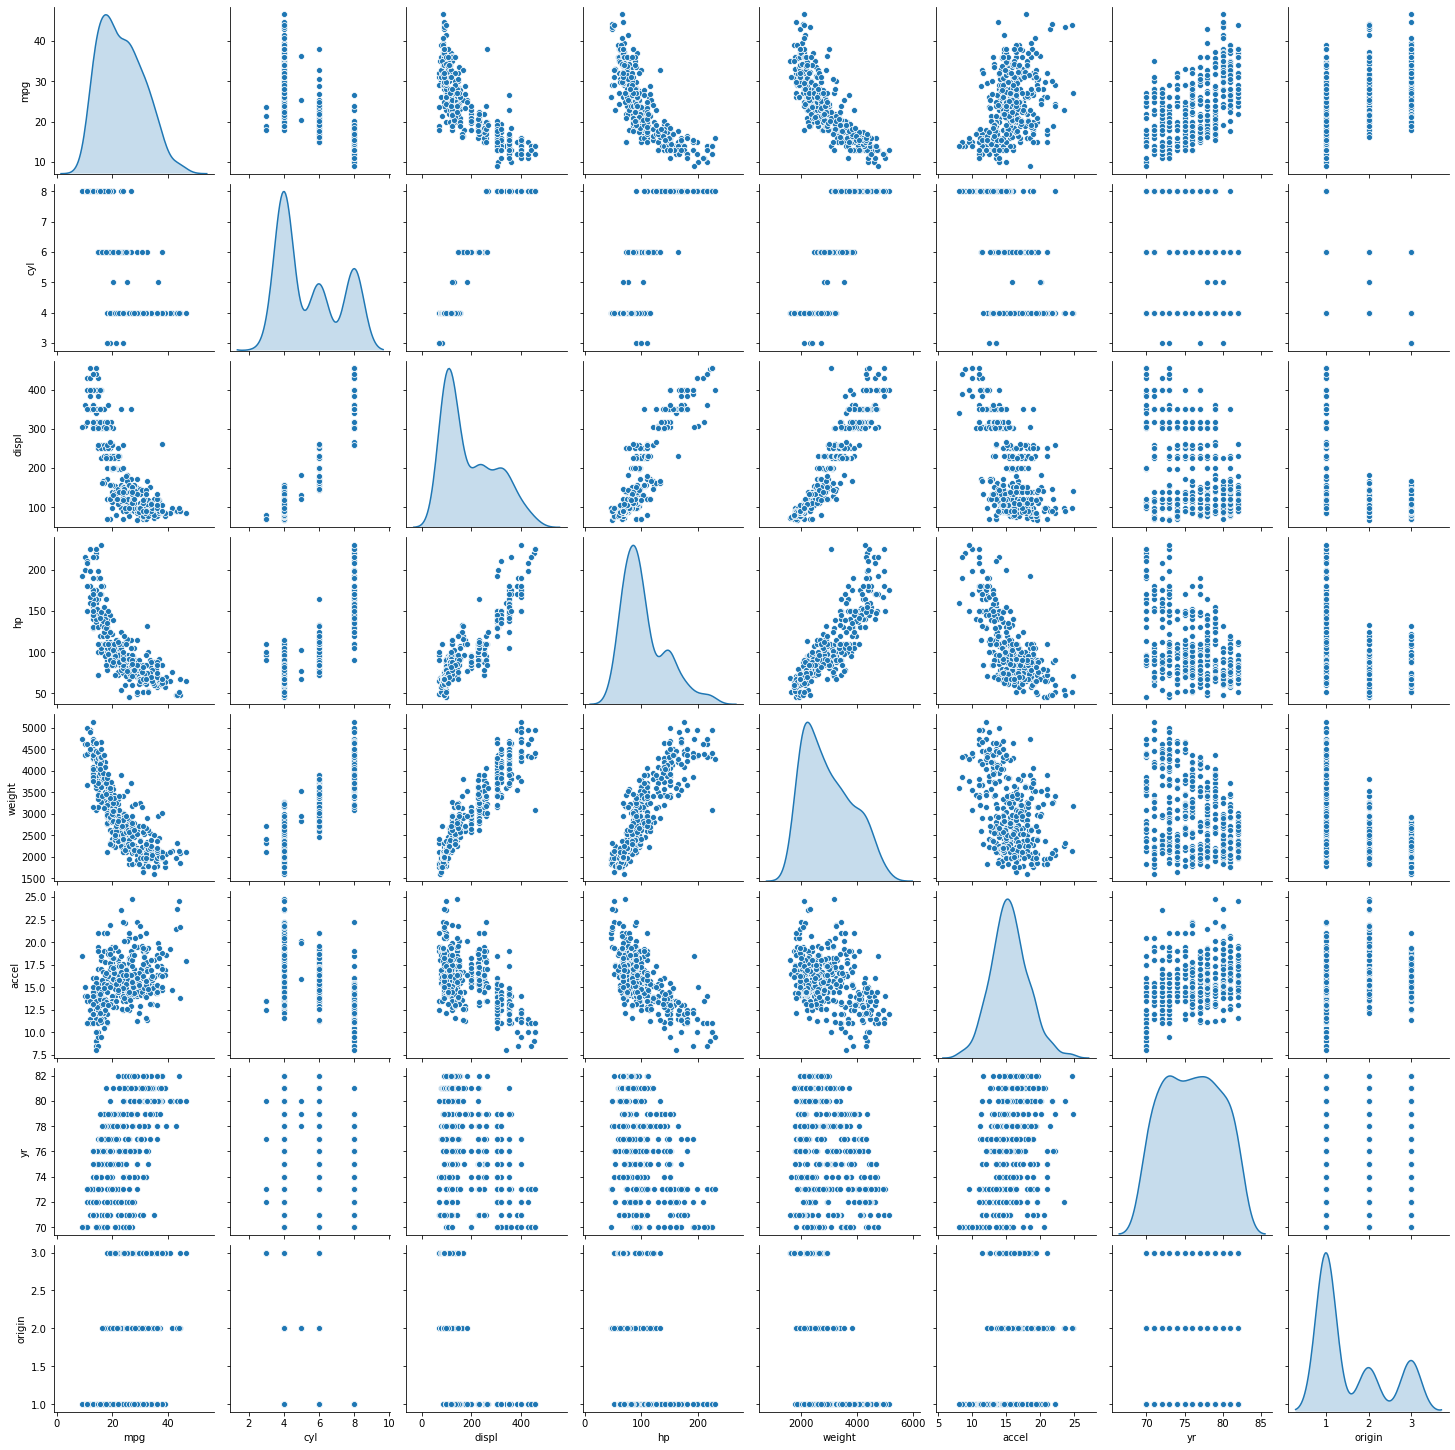

In [17]:
sns.pairplot(df, diag_kind='kde')
plt.show()

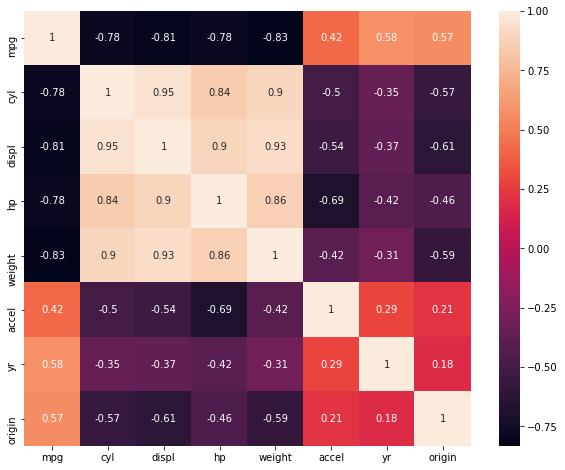

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [33]:
df

,mpg,cyl,displ,hp,weight,accel,yr,name,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,ford torino,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,ford mustang gl,1,0,0
388,44.0,4,97.0,52,2130,24.6,82,vw pickup,0,0,1
389,32.0,4,135.0,84,2295,11.6,82,dodge rampage,1,0,0
390,28.0,4,120.0,79,2625,18.6,82,ford ranger,1,0,0


In [23]:
df['origin'] = df['origin'].map({1: 'America', 2: 'Europe', 3: 'Asia'})
df = pd.get_dummies(df, columns=['origin'])

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Dropping some additional variables that are highly correlated with each other
x = df.drop(columns=['mpg', 'name', 'accel', 'hp'])
y = df['mpg']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [141]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
305,26.8,26.566638
61,13.0,11.975385
14,24.0,23.925579
32,19.0,21.765735
283,17.0,19.895441
...,...,...
328,33.8,33.276261
339,39.1,36.587434
100,23.0,20.750552
274,21.6,26.913792


In [142]:
print(f"{'-'*30}\ny-intercept: {lr.intercept_}\n{'-'*30}")
for var, coef in zip(x.columns, lr.coef_):
    print(f"Variable: {var}\nCoefficient: {coef}\n{'='*30}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R Squared (Train): {lr.score(x_train, y_train)}")
print(f"R-Squared (Test): {lr.score(x_test, y_test)}")

------------------------------
y-intercept: -16.140171198476963
------------------------------
Variable: cyl
Coefficient: -0.41158885150430763
Variable: displ
Coefficient: 0.018826018260425816
Variable: weight
Coefficient: -0.007309696819186701
Variable: yr
Coefficient: 0.7992597461662593
Variable: origin_America
Coefficient: -1.4858970317851055
Variable: origin_Asia
Coefficient: 0.9751839935253124
Variable: origin_Europe
Coefficient: 0.5107130382597931
Mean Squared Error: 10.076046744658456
Root Mean Squared Error: 3.1742789330269097
Mean Absolute Error: 2.450354782210093
R Squared (Train): 0.819164677718341
R-Squared (Test): 0.8209022774703172


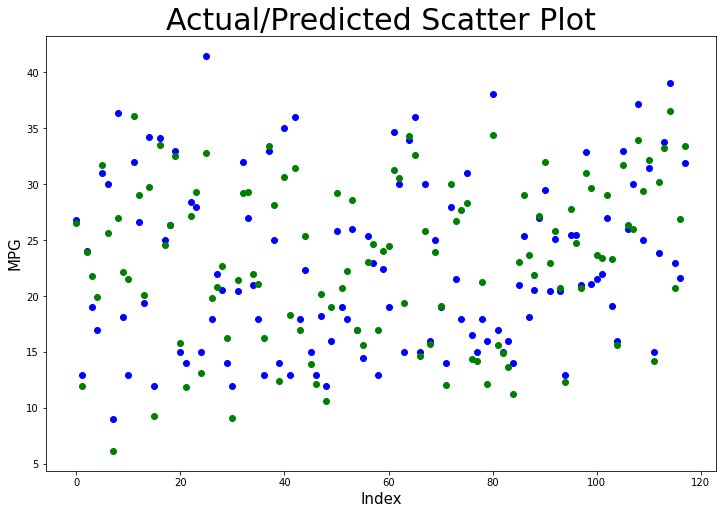

In [150]:
plt.figure(figsize=(12,8))
plt.scatter(y_test.reset_index(drop=True).index, y_test, c='blue', label='Actual')
plt.scatter(pd.Series(y_pred).index, y_pred, c='green', label='Predicted')
plt.title('Actual/Predicted Scatter Plot', fontsize=30)
plt.ylabel('MPG', fontsize=15)
plt.xlabel('Index', fontsize=15)
plt.show()